### O que foi feito no projeto anterior

In [4]:
import torch
from torch import nn
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [5]:
np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

In [ ]:

def plotmodel(w1, w2, b):

  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5 #a
w2 = 1  #b
b  = -0.4  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

### Agora vamos fazer a solução só que usando outras funções de ativação (usando o pytorch)

In [25]:
pc = nn.Linear(2, 1) # entra duas informações e sai uma. As entradas são as coordenadas
sigmoid = nn.Sigmoid() # Iremos usar a função sigmoid

print(pc.weight.data)
print(pc.bias.data)

pc.weight = nn.Parameter(torch.Tensor([[w1, w2]]))
pc.bias = nn.Parameter(torch.Tensor([b]))

print(pc.weight.data)
print(pc.bias.data)

w1 = 5
w2 = 1
b = -0.4

tensor([[0.6846, 0.2709]])
tensor([-0.6522])
tensor([[5., 1.]])
tensor([-0.4000])


Por que o peso é definido sempre como [ [x1, x2] ]?

Isso ocorre porque a entrada dos pesos precisa sempre ser uma matriz, apenas isso kk

> [O que é uma função sigmoide?](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_sigmoide)

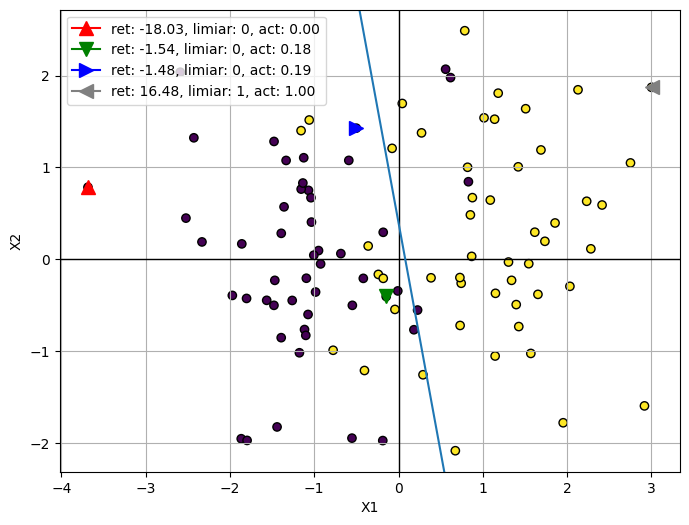

In [26]:
plt.figure(figsize=(8, 6))
plotmodel(w1, w2, b)

for k, idx in enumerate([17, 21, 43, 66]):
    x = torch.Tensor(X[idx])  # Obtém as coordenadas
    ret = pc(x)               # Passa pelo modelo linear
    act = sigmoid(ret)        # Aplica a função sigmoid

    # Classificação com base no limiar 0
    act_lin = 0 if ret.data < 0 else 1

    # Criando a label para cada ponto
    label = f'ret: {ret.data.numpy()[0]:5.2f}, limiar: {act_lin}, act: {act.data.numpy()[0]:4.2f}'

    # Plota o ponto no gráfico com marcador e cor distintos
    plt.plot(x[0], x[1], marker=markers[k], color=colors[k], label=label, markersize=10)

# Exibe a legenda corretamente
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()


Aqui tudo é um intervalo entre 0 e 1. Ou seja, quanto mais longe da fronteira mais "certeza" o computadoor vai ter que ele pertence à X classe, no caso do ponto cinza(<) pelo fsto de ela estar beeeem distante da fronteira(a linha) o computador tem certeza que ele pertence à classe 1, diferente do ponto verde(v) que já por ele estar mais próximo da linha, o computador não tem total certeza (no caso é grande mas não total) que o ponto realmente pertence à classe. Isso pode ser útil para achar um "neurônio" com problema